# Exercise 5: Peceptual Bistability

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

## 1. Binocular Rivalry

In [12]:
def heaviside_step(x):
    if x >= 0:
        return 1.0
    else:
        return 0.0

def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
# def laing_chow(x0, t, I1, I2):
#     alpha = 0.2
#     beta = 0.4
#     phi = 0.4
#     tau = 20.0
#     g1 = 1.0
#     g2 = 1.0
    u1 = x[0]
    a1 = x[1]
    u2 = x[2]
    a2 = x[3]

    du1_dt = lambda u1 : - u1 + heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2_dt = lambda u2 : - u2 + heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1_dt = lambda a1 : (-a1 + phi * heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))/tau
    da2_dt = lambda a2 : (-a2 + phi * heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))/tau

    print(u1, u2, a1, a2)
    return [du1_dt(u1), du2_dt(u2), da1_dt(a1), da2_dt(a2)]

In [13]:
# def heaviside_step(x):
#     if x >= 0:
#         return 1.0
#     else:
#         return 0.0

# # def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
# def laing_chow(x, t, I1, I2):
#     alpha = 0.2
#     beta = 0.4
#     phi = 0.4
#     tau = 20.0
#     g1 = 1.0
#     g2 = 1.0
#     u1 = x[0]
#     a1 = x[1]
#     u2 = x[2]
#     a2 = x[3]

#     du1_dt =  - u1 + heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
#     du2_dt =  - u2 + heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
#     da1_dt =  (-a1 + phi * heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))/tau
#     da2_dt =  (-a2 + phi * heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))/tau

#     return [du1_dt, du2_dt, da1_dt, da2_dt]

In [14]:

# def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
# # def laing_chow(x0, t, I1, I2):
# #     alpha = 0.2
# #     beta = 0.4
# #     phi = 0.4
# #     tau = 20.0
# #     g1 = 1.0
# #     g2 = 1.0
# #     u1 = x[0]
# #     a1 = x[1]
# #     u2 = x[2]
# #     a2 = x[3]

#     du1_dt = lambda y : - x[0] + heaviside_step(alpha * x[0] * g1 - beta * x[2] * g2 - x[1] + I1)
#     du2_dt = lambda y : - x[2] + heaviside_step(alpha * x[2] * g2 - beta * x[0] * g1 - x[3] + I2)
#     da1_dt = lambda y : (-x[1] + phi * heaviside_step(alpha * x[0] * g1 - beta * x[2] * g2 - x[1] + I1))/tau
#     da2_dt = lambda y : (-x[3] + phi * heaviside_step(alpha * x[2] * g2 - beta * x[0] * g1 - x[3] + I2))/tau

# #     print(u1, u2, a1, a2)
#     return [du1_dt(x[0]), du2_dt(x[1]), da1_dt(x[2]), da2_dt(x[2])]

In [15]:
# u1 = 1, a1 = 0.1, u2 = 0, a2 = 0.25
x0 = [1.0, 0.1, 0.0, 0.25]
t = np.linspace(0, 500, 50)
I1 = 0.43
I2 = 0.5
a = odeint(laing_chow, x0, t, args=(I1, I2))

1.0 0.0 0.1 0.25
1.0 1.846916296612945e-05 0.1 0.24998460903086156
1.0 1.846916296612945e-05 0.09999997725933463 0.24998460997838928
1.0 3.6938328732265934e-05 0.09999995451866925 0.24996921995666188
1.0 3.693833013226945e-05 0.09999993177800043 0.2499692209041313
1.0 0.0007012813307043258 0.09998358416431677 0.24941628444216138
1.0 0.0007012976199448162 0.09998358412417262 0.2494162837635268
1.0 0.0013656931098372286 0.09993781167295077 0.24886457108726084
1.0 0.0013657256900045703 0.09993781087131082 0.248864569731491
1.0 0.0020302551252959454 0.0998626094140221 0.24831407745594608
1.0 0.002030287709235673 0.09986260716931933 0.24831407610317446
1.0 0.003653033534517679 0.09955548340867426 0.24697568708324621
1.0 0.0036531144648406576 0.09955546277384345 0.24697568375723178
1.0 0.005278172133385342 0.09907282827406819 0.24564450113875608
1.0 0.005278091597359844 0.09907278801140938 0.24564450459075265
1.0 0.0069061518063357604 0.09841436421530804 0.24432050026467528
1.0 0.00690615229

1.0 0.2866976993540389 -0.7615090347133736 0.1573395399267092
1.0000000149011612 0.2866976993540389 -0.7615090347133736 0.1573395399267092
1.0 0.2866976993540389 -0.7615090233660048 0.1573395399267092
1.0 0.28669770362616753 -0.7615090347133736 0.1573395399267092
1.0 0.2866976993540389 -0.7615090347133736 0.15733954227125105
1.0 0.2866976993540391 -0.7615091603177299 0.15733953741462212
1.0 0.2866976993540383 -0.7615090338183013 0.15733953994461067
1.0 0.28669769384415356 -0.761509101716318 0.15733953878902002
1.0000000149011612 0.28669769384415356 -0.761509101716318 0.15733953878902002
1.0 0.28669769384415356 -0.7615090903689482 0.15733953878902002
1.0 0.2866976981162821 -0.761509101716318 0.15733953878902002
1.0 0.28669769384415356 -0.761509101716318 0.15733954113356186
1.0 0.28669769384415356 -0.7615091331174085 0.15733953816099822
1.0 0.2866976938441535 -0.7615091014925442 0.1573395387934955
1.0 0.2866976924666822 -0.761509118467054 0.15733953850459773
1.0000000149011612 0.28669769

1.0 0.28669911255279856 -0.7614922987926956 0.15733982251333678
1.0 0.28669911682494825 -0.7614923101398153 0.15733982251333678
1.0 0.28669911255279856 -0.7614923101398153 0.15733982485788284
1.0 0.28669911255279856 -0.7614923314063483 0.15733982208800612
1.0 0.28669911255279856 -0.7614923101398154 0.15733982251333678
1.0 0.2866991116265143 -0.7614923215168931 0.1573398223198165
1.0000000149011612 0.2866991116265143 -0.7614923215168931 0.1573398223198165
1.0 0.2866991116265143 -0.7614923101697733 0.1573398223198165
1.0 0.286699115898664 -0.7614923215168931 0.1573398223198165
1.0 0.2866991116265143 -0.7614923215168931 0.15733982466436255
1.0 0.28669911193527575 -0.7614923177245339 0.15733982238432326
1.0 0.2866991125527986 -0.7614923101398154 0.15733982251333678
1.0000000149011612 0.2866991125527986 -0.7614923101398154 0.15733982251333678
1.0 0.2866991125527986 -0.7614922987926958 0.15733982251333678
1.0 0.2866991168249483 -0.7614923101398154 0.15733982251333678
1.0 0.2866991125527986 -

In [16]:
odeint

<function scipy.integrate.odepack.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)>

In [17]:
type(a)

numpy.ndarray

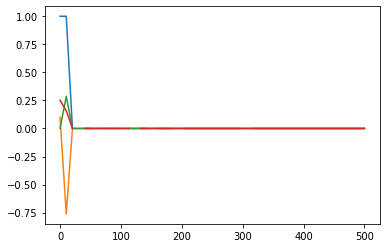

In [18]:
plt.plot(t, a[:, 0])
plt.plot(t, a[:, 1])
plt.plot(t, a[:, 2])
plt.plot(t, a[:, 3])

In [19]:
# def pend(y, t, b, c):
#     theta, omega = y
#     dydt = [omega, -b*omega - c*np.sin(theta)]
#     return dydt

In [20]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = lambda omega: -b*omega -c*np.sin(theta)
    o = lambda omega: omega
    return [o(omega), dydt(omega)]

In [21]:
t = np.linspace(0, 10, 101)
y0 = [np.pi - 0.1, 0.0]
b = 0.25
c = 5.0
sol = odeint(pend, y0, t, args=(b, c))

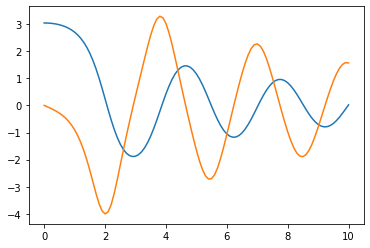

In [22]:
plt.plot(t, sol[:, 0])
plt.plot(t, sol[:, 1])